# Install

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import time
import os

# proxyの設定．
# keras.datasetsでは，datasetを直接ダウンロードするので，学内マシンからは通常必要．
#os.environ["http_proxy"] = "http://proxy.uec.ac.jp:8080/"
#os.environ["https_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"      # "0":GPU0, "1":GPU1, "0,1":GPUを2つとも使用

import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import math

In [3]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2241 (delta 0), reused 1 (delta 0), pack-reused 2238
Receiving objects: 100% (2241/2241), 8.05 MiB | 1.91 MiB/s, done.
Resolving deltas: 100% (1449/1449), done.
Checking connectivity... done.


In [3]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [ ]:
!bash ./datasets/download_pix2pix_dataset.sh facades

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [9]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2020-05-08 21:25:17--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving proxy.uec.ac.jp (proxy.uec.ac.jp)... 130.153.8.24
Connecting to proxy.uec.ac.jp (proxy.uec.ac.jp)|130.153.8.24|:8080... connected.
Proxy request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: './checkpoints/facades_label2photo_pretrained/latest_net_G.pth'

100%[======================================>] 217,704,720 26.5MB/s   in 8.5s   

2020-05-08 21:25:26 (24.4 MB/s) - './checkpoints/facades_label2photo_pretrained/latest_net_G.pth' saved [217704720/217704720]



# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [6]:
%run train.py --dataroot ./datasets/facades --name facade_res_pix2pix --model pix2pix --direction BtoA --gpu_ids 0,1 --batch_size 16 --netG resnet_9blocks

----------------- Options ---------------
               batch_size: 16                            	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest          

initialize network with normal
initialize network with normal
model [Pix2PixModel] was created
---------- Networks initialized -------------
[Network G] Total number of parameters : 11.383 M
[Network D] Total number of parameters : 2.769 M
-----------------------------------------------
create web directory ./checkpoints/facade_res_pix2pix/web...
(epoch: 1, iters: 400, time: 0.041, data: 0.301) G_GAN: 0.975 G_L1: 35.431 D_real: 0.533 D_fake: 0.655 
End of epoch 1 / 200 	 Time Taken: 9 sec
learning rate = 0.0002000
(epoch: 2, iters: 400, time: 0.046, data: 0.243) G_GAN: 1.569 G_L1: 37.849 D_real: 0.377 D_fake: 0.346 
End of epoch 2 / 200 	 Time Taken: 9 sec
learning rate = 0.0002000
(epoch: 3, iters: 400, time: 0.040, data: 0.240) G_GAN: 2.442 G_L1: 34.592 D_real: 1.171 D_fake: 0.140 
End of epoch 3 / 200 	 Time Taken: 9 sec
learning rate = 0.0002000
(epoch: 4, iters: 400, time: 0.041, data: 0.306) G_GAN: 1.732 G_L1: 36.047 D_real: 0.300 D_fake: 0.652 
End of epoch 4 / 200 	 Time Taken:

(epoch: 44, iters: 400, time: 0.046, data: 0.250) G_GAN: 2.179 G_L1: 34.570 D_real: 0.209 D_fake: 0.452 
End of epoch 44 / 200 	 Time Taken: 9 sec
learning rate = 0.0002000
(epoch: 45, iters: 400, time: 0.047, data: 0.250) G_GAN: 2.588 G_L1: 36.242 D_real: 0.084 D_fake: 0.203 
saving the model at the end of epoch 45, iters 18000
End of epoch 45 / 200 	 Time Taken: 11 sec
learning rate = 0.0002000
(epoch: 46, iters: 400, time: 0.048, data: 0.259) G_GAN: 1.026 G_L1: 33.258 D_real: 0.751 D_fake: 0.211 
End of epoch 46 / 200 	 Time Taken: 9 sec
learning rate = 0.0002000
(epoch: 47, iters: 400, time: 0.048, data: 0.321) G_GAN: 1.285 G_L1: 32.088 D_real: 0.350 D_fake: 0.201 
End of epoch 47 / 200 	 Time Taken: 9 sec
learning rate = 0.0002000
(epoch: 48, iters: 400, time: 0.049, data: 0.255) G_GAN: 2.612 G_L1: 35.836 D_real: 0.148 D_fake: 0.379 
End of epoch 48 / 200 	 Time Taken: 9 sec
learning rate = 0.0002000
(epoch: 49, iters: 400, time: 0.053, data: 0.306) G_GAN: 3.239 G_L1: 33.148 D_rea

(epoch: 88, iters: 400, time: 0.054, data: 0.255) G_GAN: 1.843 G_L1: 31.980 D_real: 0.371 D_fake: 0.163 
End of epoch 88 / 200 	 Time Taken: 10 sec
learning rate = 0.0002000
(epoch: 89, iters: 400, time: 0.051, data: 0.242) G_GAN: 1.168 G_L1: 32.082 D_real: 0.274 D_fake: 0.314 
End of epoch 89 / 200 	 Time Taken: 10 sec
learning rate = 0.0002000
(epoch: 90, iters: 400, time: 0.051, data: 0.268) G_GAN: 1.131 G_L1: 30.037 D_real: 0.802 D_fake: 0.183 
saving the model at the end of epoch 90, iters 36000
End of epoch 90 / 200 	 Time Taken: 11 sec
learning rate = 0.0002000
(epoch: 91, iters: 400, time: 0.054, data: 0.274) G_GAN: 0.995 G_L1: 33.536 D_real: 1.037 D_fake: 0.127 
End of epoch 91 / 200 	 Time Taken: 10 sec
learning rate = 0.0002000
(epoch: 92, iters: 400, time: 0.053, data: 0.328) G_GAN: 1.716 G_L1: 34.349 D_real: 1.167 D_fake: 0.064 
End of epoch 92 / 200 	 Time Taken: 10 sec
learning rate = 0.0002000
(epoch: 93, iters: 400, time: 0.054, data: 0.255) G_GAN: 3.094 G_L1: 31.834 D

(epoch: 132, iters: 400, time: 0.057, data: 0.311) G_GAN: 1.360 G_L1: 28.649 D_real: 0.565 D_fake: 0.222 
End of epoch 132 / 200 	 Time Taken: 10 sec
learning rate = 0.0001347
(epoch: 133, iters: 400, time: 0.060, data: 0.270) G_GAN: 1.350 G_L1: 28.708 D_real: 0.402 D_fake: 0.301 
End of epoch 133 / 200 	 Time Taken: 10 sec
learning rate = 0.0001327
(epoch: 134, iters: 400, time: 0.057, data: 0.270) G_GAN: 1.405 G_L1: 27.025 D_real: 0.179 D_fake: 0.624 
End of epoch 134 / 200 	 Time Taken: 10 sec
learning rate = 0.0001307
(epoch: 135, iters: 400, time: 0.057, data: 0.259) G_GAN: 2.240 G_L1: 30.482 D_real: 0.079 D_fake: 0.631 
saving the model at the end of epoch 135, iters 54000
End of epoch 135 / 200 	 Time Taken: 11 sec
learning rate = 0.0001287
(epoch: 136, iters: 400, time: 0.059, data: 0.251) G_GAN: 2.113 G_L1: 28.342 D_real: 0.085 D_fake: 0.685 
End of epoch 136 / 200 	 Time Taken: 10 sec
learning rate = 0.0001267
(epoch: 137, iters: 400, time: 0.057, data: 0.269) G_GAN: 1.509 G_

saving the model at the end of epoch 175, iters 70000
End of epoch 175 / 200 	 Time Taken: 11 sec
learning rate = 0.0000495
(epoch: 176, iters: 400, time: 0.063, data: 0.274) G_GAN: 2.426 G_L1: 25.933 D_real: 0.175 D_fake: 0.143 
End of epoch 176 / 200 	 Time Taken: 10 sec
learning rate = 0.0000475
(epoch: 177, iters: 400, time: 0.061, data: 0.299) G_GAN: 1.386 G_L1: 24.764 D_real: 0.447 D_fake: 0.305 
End of epoch 177 / 200 	 Time Taken: 10 sec
learning rate = 0.0000455
(epoch: 178, iters: 400, time: 0.062, data: 0.253) G_GAN: 1.888 G_L1: 26.797 D_real: 0.598 D_fake: 0.148 
End of epoch 178 / 200 	 Time Taken: 10 sec
learning rate = 0.0000436
(epoch: 179, iters: 400, time: 0.064, data: 0.252) G_GAN: 1.701 G_L1: 25.460 D_real: 0.330 D_fake: 0.282 
End of epoch 179 / 200 	 Time Taken: 10 sec
learning rate = 0.0000416
(epoch: 180, iters: 400, time: 0.063, data: 0.270) G_GAN: 2.214 G_L1: 28.837 D_real: 0.209 D_fake: 0.186 
saving the model at the end of epoch 180, iters 72000
End of epoch

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [7]:
!ls checkpoints/

facade_res_pix2pix  facades_label2photo_pretrained  facades_pix2pix


In [11]:
%run test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facade_res_pix2pix --netG resnet_9blocks

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

# Visualize

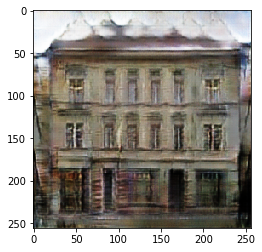

In [12]:
import matplotlib.pyplot as plt

img = plt.imread('./results/facades_pix2pix/test_latest/images/12_fake_B.png')
plt.imshow(img)

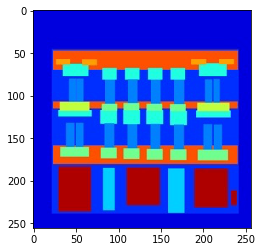

In [13]:
img = plt.imread('./results/facades_pix2pix/test_latest/images/12_real_A.png')
plt.imshow(img)

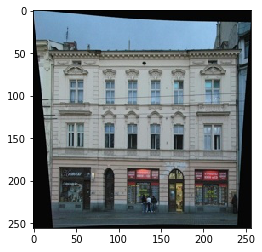

In [14]:
img = plt.imread('./results/facades_pix2pix/test_latest/images/12_real_B.png')
plt.imshow(img)